# K-means Clustering 

We will implement the K-means algorithm and use it for image compression. 

* We will start with a sample dataset that will help you gain an intuition of how the K-means algorithm works. 
* After that, we will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- `utils.py` contains helper functions for this assignment. You do not need to modify code in this file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [2]:
# Load an dataset that we will use
X = load_data()

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* We are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and we want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).


<a name="1.1"></a>
### 1.1 Finding closest centroids
The algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

<a name="ex01"></a>

`find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It will output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm
 

In [3]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]): 
        distance = []                                  # Array to hold distance between X[i] and each centroids[j]
        for j in range(centroids.shape[0]):
            norm_ij =np.linalg.norm(X[i]-centroids[j]) #To calculate the norm between (X[i] - centroids[j])
            distance.append(norm_ij)                   #To calculate the norm between (X[i] - centroids[j])
        idx[i] =np.argmin(distance)                    #To calculate index of minimum value in distance

    return idx

In [4]:
print("First five elements of X are:\n", X[:3]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]]
The shape of X is: (300, 2)


In [5]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])   # Select an initial set of centroids (3 Centroids)
idx = find_closest_centroids(X, initial_centroids)    # Find closest centroids using initial_centroids
print("First three elements in idx are:", idx[:3])    # Print closest centroids for the first three elements


First three elements in idx are: [0 2 1]


<a name="1.2"></a>
### 1.2 Computing centroid means

The second phase of the algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$

* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.


In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
 
    for k in range(K):
        points=X[k==idx] # To get a list of all data points in X assigned to centroid k
        centroids[k]=np.mean(points,axis=0) # To compute the mean of the points assigned
    return centroids

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


<a name="2"></a>
## 2 - K-means on a sample dataset 

The next step is to run the K-means algorithm on a 2D dataset to get the understanding how
K-means works. 


In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/14
K-Means iteration 1/14
K-Means iteration 2/14
K-Means iteration 3/14
K-Means iteration 4/14
K-Means iteration 5/14
K-Means iteration 6/14
K-Means iteration 7/14
K-Means iteration 8/14
K-Means iteration 9/14
K-Means iteration 10/14
K-Means iteration 11/14
K-Means iteration 12/14
K-Means iteration 13/14
K-Means iteration 14/14


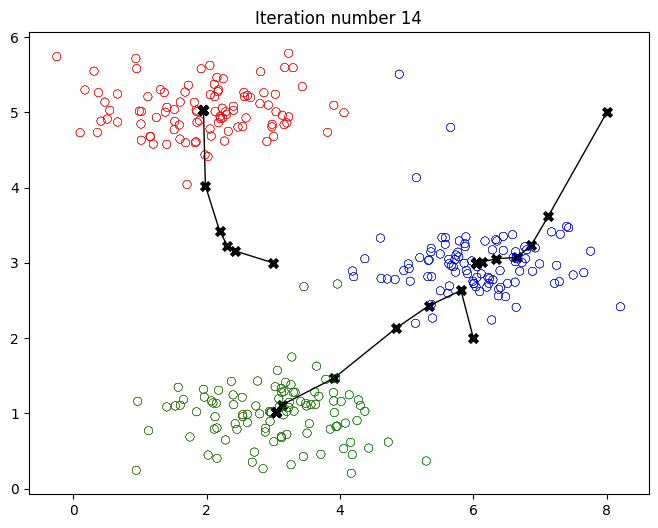

In [9]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 15

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.


In [10]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/14
K-Means iteration 1/14
K-Means iteration 2/14
K-Means iteration 3/14
K-Means iteration 4/14
K-Means iteration 5/14
K-Means iteration 6/14
K-Means iteration 7/14
K-Means iteration 8/14
K-Means iteration 9/14
K-Means iteration 10/14
K-Means iteration 11/14
K-Means iteration 12/14
K-Means iteration 13/14
K-Means iteration 14/14


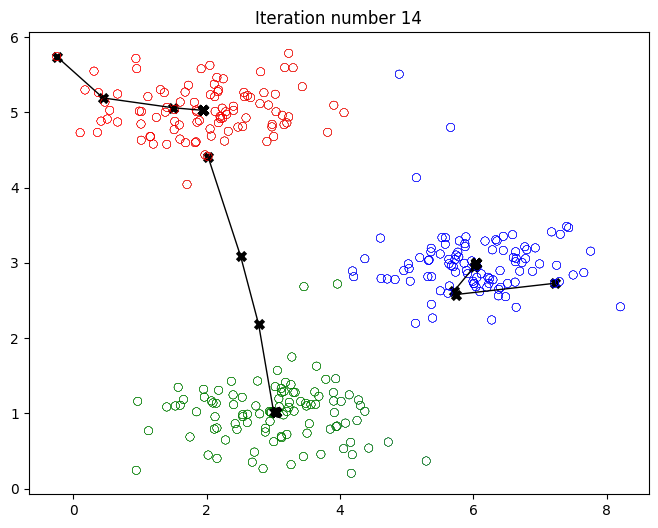

In [11]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 15

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="4"></a>
## 4 - Image compression with K-means

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and  we will reduce the number ofcolors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, we only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, we will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once we have computed the cluster centroids on the image, we will then use the 16 colors to replace the pixels in the original image.

In [12]:
# Load an image 
original_img = plt.imread('bird_small.png')

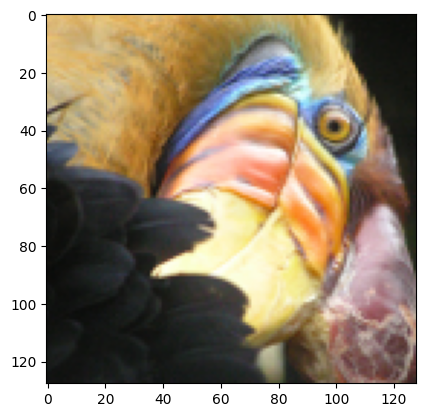

In [13]:
# Visualizing the image
plt.imshow(original_img)

In [14]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


As We can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[60, 23, 2]` gives the blue intensity of the pixel at row 60 and column 23.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [15]:
# Divide by 255 so that all values are in the range 0 - 1 
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [16]:
K = 16
max_iters = 10

# Using the function we have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [17]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [6 6 6 6 6]


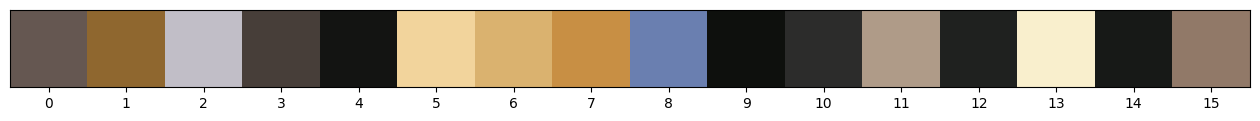

In [18]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

After finding the top $K=16$ colors to represent the image, We can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows us to represent the original image using the centroid assignments of each pixel. 
* Notice that we have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [19]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

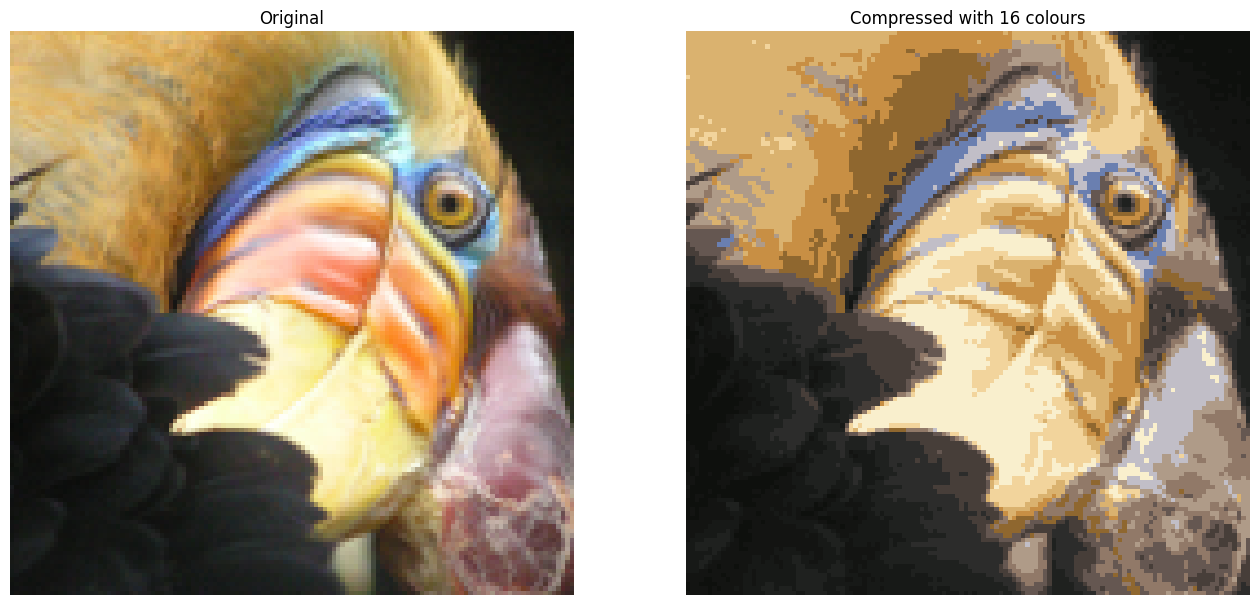

In [21]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()